In [1]:
# 1. 주민등록인구 및 세대현황 파일을 데이터프레임으로 가져오기

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('202208_202208_주민등록인구및세대현황_월간.csv', encoding='cp949')
data.head(2)

,행정구역,2022년08월_총인구수,2022년08월_세대수,2022년08월_세대당 인구,2022년08월_남자 인구수,2022년08월_여자 인구수,2022년08월_남여 비율
0,서울특별시 (1100000000),"9,488,454","4,472,975",2.12,"4,601,295","4,887,159",0.94
1,서울특별시 종로구 (1111000000),"143,499","73,866",1.94,"69,408","74,091",0.94


In [5]:
data = pd.read_excel('202208_202208_주민등록인구및세대현황_월간.xlsx', header=2)
data.head(2)

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1100000000,서울특별시,"9,488,454","4,472,975",2.12,"4,601,295","4,887,159",0.94
1,1111000000,서울특별시 종로구,"143,499","73,866",1.94,"69,408","74,091",0.94


In [6]:
# 2. 컬럼의 이름을 행정기관코드, 행정구역, 총인구수, 세대수, 세대당인구, 남자, 여자, 남여비율로 변경하세요.
data.columns

Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

In [7]:
data.columns = ['행정기관코드', '행정구역', '총인구수', '세대수', '세대당인구', '남자', '여자', '남여비율']

In [8]:
data.head(1)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,남여비율
0,1100000000,서울특별시,"9,488,454","4,472,975",2.12,"4,601,295","4,887,159",0.94


In [9]:
# 3. 남여비율 컬럼을 제거합니다

In [10]:
data.drop(columns=['남여비율'], inplace=True) #inplace : 바로 덮어쓰기.

In [11]:
data.head(10)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자
0,1100000000,서울특별시,"9,488,454","4,472,975",2.12,"4,601,295","4,887,159"
1,1111000000,서울특별시 종로구,"143,499","73,866",1.94,"69,408","74,091"
2,1111051500,서울특별시 종로구 청운효자동,"11,766","5,198",2.26,"5,392","6,374"
3,1111053000,서울특별시 종로구 사직동,"9,278","4,668",1.99,"4,124","5,154"
4,1111054000,서울특별시 종로구 삼청동,"2,384","1,188",2.01,"1,130","1,254"
5,1111055000,서울특별시 종로구 부암동,"9,411","4,232",2.22,"4,476","4,935"
6,1111056000,서울특별시 종로구 평창동,"17,915","7,418",2.42,"8,345","9,570"
7,1111057000,서울특별시 종로구 무악동,"8,106","3,049",2.66,"3,757","4,349"
8,1111058000,서울특별시 종로구 교남동,"9,944","4,434",2.24,"4,579","5,365"
9,1111060000,서울특별시 종로구 가회동,"3,978","1,968",2.02,"1,830","2,148"


In [12]:
# 4. 행정구역 컬럼을 이용해서 시, 구, 동 컬럼을 만들어 분리해 넣고 
#    개별 데이터만 남기고 대분류, 중분류에 해당하는 데이터는 삭제한다.
#    부산 지역의 값만 가지고 

In [13]:
data['시'] = data['행정구역'].str.split().str.get(0)
data['구'] = data['행정구역'].str.split().str.get(1)
data['동'] = data['행정구역'].str.split().str.get(2)

In [14]:
data.head(5)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
0,1100000000,서울특별시,"9,488,454","4,472,975",2.12,"4,601,295","4,887,159",서울특별시,NaN,NaN
1,1111000000,서울특별시 종로구,"143,499","73,866",1.94,"69,408","74,091",서울특별시,종로구,NaN
2,1111051500,서울특별시 종로구 청운효자동,"11,766","5,198",2.26,"5,392","6,374",서울특별시,종로구,청운효자동
3,1111053000,서울특별시 종로구 사직동,"9,278","4,668",1.99,"4,124","5,154",서울특별시,종로구,사직동
4,1111054000,서울특별시 종로구 삼청동,"2,384","1,188",2.01,"1,130","1,254",서울특별시,종로구,삼청동


In [15]:
data.dropna(inplace=True)
data.head(3)

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
2,1111051500,서울특별시 종로구 청운효자동,"11,766","5,198",2.26,"5,392","6,374",서울특별시,종로구,청운효자동
3,1111053000,서울특별시 종로구 사직동,"9,278","4,668",1.99,"4,124","5,154",서울특별시,종로구,사직동
4,1111054000,서울특별시 종로구 삼청동,"2,384","1,188",2.01,"1,130","1,254",서울특별시,종로구,삼청동


In [16]:
busan = data[data['시'] == '부산광역시']
busan

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
454,2611051000,부산광역시 중구 중앙동,"3,139","2,435",1.29,"1,475","1,664",부산광역시,중구,중앙동
455,2611052000,부산광역시 중구 동광동,"2,590","1,703",1.52,"1,323","1,267",부산광역시,중구,동광동
456,2611053000,부산광역시 중구 대청동,"6,185","3,562",1.74,"2,877","3,308",부산광역시,중구,대청동
457,2611054500,부산광역시 중구 보수동,"10,464","6,029",1.74,"5,052","5,412",부산광역시,중구,보수동
458,2611056000,부산광역시 중구 부평동,"4,430","2,748",1.61,"2,103","2,327",부산광역시,중구,부평동
...,...,...,...,...,...,...,...,...,...,...
669,2671025000,부산광역시 기장군 기장읍,"52,213","25,757",2.03,"25,411","26,802",부산광역시,기장군,기장읍
670,2671025300,부산광역시 기장군 장안읍,"8,453","4,709",1.80,"4,568","3,885",부산광역시,기장군,장안읍
671,2671025600,부산광역시 기장군 정관읍,"81,242","32,042",2.54,"40,196","41,046",부산광역시,기장군,정관읍
672,2671025900,부산광역시 기장군 일광읍,"28,012","11,772",2.38,"13,840","14,172",부산광역시,기장군,일광읍


In [17]:
busan.reset_index(drop=True, inplace=True) #인덱스를 새로 구현 
busan

,행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
0,2611051000,부산광역시 중구 중앙동,"3,139","2,435",1.29,"1,475","1,664",부산광역시,중구,중앙동
1,2611052000,부산광역시 중구 동광동,"2,590","1,703",1.52,"1,323","1,267",부산광역시,중구,동광동
2,2611053000,부산광역시 중구 대청동,"6,185","3,562",1.74,"2,877","3,308",부산광역시,중구,대청동
3,2611054500,부산광역시 중구 보수동,"10,464","6,029",1.74,"5,052","5,412",부산광역시,중구,보수동
4,2611056000,부산광역시 중구 부평동,"4,430","2,748",1.61,"2,103","2,327",부산광역시,중구,부평동
...,...,...,...,...,...,...,...,...,...,...
200,2671025000,부산광역시 기장군 기장읍,"52,213","25,757",2.03,"25,411","26,802",부산광역시,기장군,기장읍
201,2671025300,부산광역시 기장군 장안읍,"8,453","4,709",1.80,"4,568","3,885",부산광역시,기장군,장안읍
202,2671025600,부산광역시 기장군 정관읍,"81,242","32,042",2.54,"40,196","41,046",부산광역시,기장군,정관읍
203,2671025900,부산광역시 기장군 일광읍,"28,012","11,772",2.38,"13,840","14,172",부산광역시,기장군,일광읍


In [18]:
# 5. 총인구수, 남자, 여자 컬럼의 데이터 타입을 정수형으로 변경합니다.
busan['총인구수'] = busan['총인구수'].str.replace(',','').astype('int')
busan['남자'] = busan['남자'].str.replace(',','').astype('int')
busan['여자'] = busan['여자'].str.replace(',','').astype('int')

In [19]:
# 6. 동별, 구별 부산 인구를 차트로 표시합니다.(인구순 5개동만)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
busan_gu = busan.groupby('구')['총인구수'].sum().sort_values(ascending=False).head(5)
busan_gu = busan_gu.reset_index()

<AxesSubplot:xlabel='구', ylabel='총인구수'>

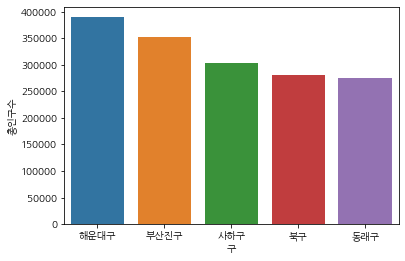

In [22]:
sns.barplot(data=busan_gu,x='구',y='총인구수')

In [23]:
busan_dong = busan.sort_values(by='총인구수',ascending=False).head(5)

<AxesSubplot:xlabel='동', ylabel='총인구수'>

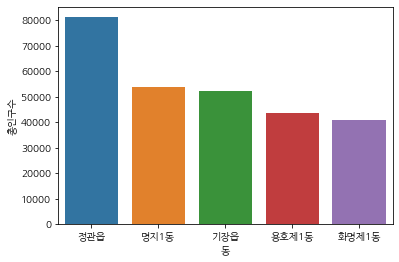

In [24]:
sns.barplot(data=busan_dong,x='동',y='총인구수')

In [25]:
# 7. 동별, 구별 남,여 인구를 차트로 표시합니다.(인구순 5개동만)

In [26]:
# 8. Choropleth, geojson을 이용하여 동별 인구수를 색상별로 지도에 표시하세요.

In [1]:
jsonfile = open('HangJeongDong_ver20220401.geojson.txt', 'r', encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_busan = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []

for item in jsondata['features']:
    #print(item['properties']['sidonm'])
    if item['properties']['sidonm'] == '부산광역시':
        #print(item['properties']['adm_nm'])
        dong = item['properties']['adm_nm'].split()[-1].strip()
        if dong == '가야제1동':
            dong = '가야1동'
        item['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(item)
        
jsondata_busan['features'] = jsondata_pick
jsondata_busan

NameError: name 'json' is not defined

In [ ]:
import folium
busan_loc = [35.2144654,128.9805666]
m = folium.Map(busan_loc, zoom_start=10.5)
folium.Choropleth(geo_data = jsondata_busan, 
                  data = busan, 
                  columns = ['동', '총인구수'], 
                  fill_color='YlGn',
                  key_on = 'feature.id').add_to(m)
m

In [ ]:
json_dong = sorted(jsondata_dong)
json_dong

In [ ]:
df_dong = sorted(busan['동'])
df_dong

In [ ]:
len(json_dong),len(df_dong)

In [ ]:
for i, item in enumerate(zip(df_dong,json_dong)):
    print(i,item)

In [ ]:
busan['동'] = busan['동'].str.replace('제','')

In [ ]:
busan['동'] = busan['동'].replace(['거1동','거2동','거3동','거4동'],['거제1동','거제2동','거제3동','거제4동'])

In [ ]:
import folium
busan_loc = [35.2144654,128.9805666]
m = folium.Map(busan_loc, zoom_start=10.5)
cho = folium.Choropleth(geo_data = jsondata_busan, 
                  data = busan, 
                  columns = ['동', '총인구수'], 
                  fill_color='YlGn',
                  key_on = 'feature.id').add_to(m)
cho.geojson.add_child(folium.features.GeoJsonTooltip(['adm_nm']))
m

In [ ]:
# 지역별 수치데이터
# 지역 선택
# 특정 지역 동별로 값의 변화 나타낼 수 있게끔 ..

